<a href="https://colab.research.google.com/github/Camicb/bank-marketing/blob/main/Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bank Marketing (with social/economic context)**

#1. Introduction

The present dataset is based on "Bank Marketing" UCI [dataset](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data was enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available for research. The details are described in: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. *A Data-Driven Approach to Predict the Success of Bank Telemarketing*. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001. 

**OBJECTIVE:** The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit. 


###About the data

INPUT VARIABLES:


   1 - **age** (numeric)

   2 - **job** : type of job (categorical: "admin.", "blue-collar",  "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")

   3 - **marital** : marital status (categorical: "divorced", "married", "single", "unknown";  note: "divorced" means divorced or widowed)

   4 - **education** (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")

   5 - **default**: has credit in default? (categorical: "no", "yes", "unknown")

   6 - **housing**: has housing loan? (categorical: "no", "yes", "unknown")

   7 - **loan**: has personal loan? (categorical: "no", "yes", "unknown")

   8 - **contact**: contact communication type (categorical: "cellular", "telephone") 

   9 - **month**: last contact month of year (categorical: "jan",  "feb",  "mar",  ...,  "nov",  "dec")

  10 - **day_of_week**: last contact day of the week (categorical: "mon", "tue", "wed", "thu", "fri")

  11 - **duration**: last contact duration, in seconds (numeric). **Important note**:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - **previous**: number of contacts performed before this campaign and for this client (numeric)

  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
 
   16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)

  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)     

  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)     

  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)

  20 - **nr.employed**: number of employees - quarterly indicator (numeric)


OUTPUT VARIABLE (DESIRED TARGET):

  21 - **subscribed** - has the client subscribed a term deposit? (binary: "yes","no")

NOTE: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

#2. Import Required Libraries

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
!pip install scikit-plot -q
!pip install -U imbalanced-learn -q
!jupyter nbextension enable --py widgetsnbextension -q
!pip install delayed -q
!pip install pycaret[full] -q

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from pandas_profiling import ProfileReport
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from pycaret.classification import *
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
# A seed for reproducibility
np.random.seed(2021) 

# 3. Exploratory data analysis

I uploaded the particular dataset use here to a personal Google Drive folder, and it can also be found [here](https://github.com/Camicb/bank-marketing/blob/main/bank-additional-full.xlsx). I only changed the type of file from the original dataset for better readability.

In [4]:
# Loading the data
bank = pd.read_excel('/content/drive/MyDrive/DATASETS/bank-additional/bank-additional-full.xlsx', na_values='unknown')

In [5]:
# Inspecting the data
bank.info()
bank.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Statistical report
profile = ProfileReport(bank, html={'style': {'full_width': True, 'primary_color': '#30b6c2'}},  samples=None, missing_diagrams=None, interactions=None)
profile.to_file("report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

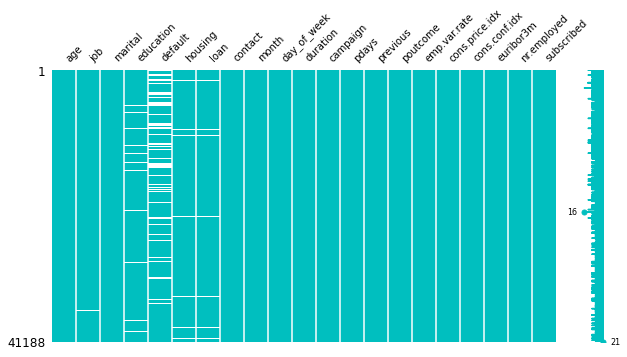

In [7]:
# Visualization of missing values
msno.matrix(bank, figsize=(10,5), fontsize=10, color=(0.0, 0.75, 0.75))

In [8]:
# Fixing data types 
bank['default'] = bank['default'].astype('category')
bank['loan'] = bank['loan'].astype('category')
bank['housing'] = bank['housing'].astype('category')
bank['subscribed'] = bank['subscribed'].astype('category')

# Filling missing values with the original unknown category
bank.replace({np.nan: 'unknown'}, inplace=True)
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  object  
 2   marital         41188 non-null  object  
 3   education       41188 non-null  object  
 4   default         41188 non-null  object  
 5   housing         41188 non-null  object  
 6   loan            41188 non-null  object  
 7   contact         41188 non-null  object  
 8   month           41188 non-null  object  
 9   day_of_week     41188 non-null  object  
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  object  
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

# 5. Modeling

I will split the data into training and testing datasets, and then I will re-split the training data to get a validation dataset. I will also keep the duration variable for reference.

In [9]:
# Spliting data into training and test datasets
train, test = train_test_split(bank, test_size=0.1,stratify=bank['subscribed'])
print(train.shape, test.shape)

(37069, 21) (4119, 21)


I will use a library called [Pycaret](https://pycaret.readthedocs.io/en/latest/api/classification.html) for modeling, which allows choosing between many models based on a given metric, and performing preprocessing steps with a few lines. For preprocessing, I will use standardization for numerical variables, one-hot encoding for categorical variables, and  SMOTE to fix the imbalanced target variable. I will also use cross-validation in the training process.

In [10]:
# Selecting numerical and categorical variables
num_var = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
           'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

cat_var = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome']
       
# Setting up environment for classification
clf=setup(data = train, 
          target = 'subscribed',
          train_size = 0.9,
          data_split_stratify = True,
          fold_strategy = 'stratifiedkfold',
          fold = 5,
          fold_shuffle = True, 
          categorical_features = cat_var,
          numeric_features = num_var,
          normalize = True,
          normalize_method = 'zscore',
          fix_imbalance = True,
          session_id = 123)

,Description,Value
0,session_id,123
1,Target,subscribed
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(37069, 21)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


I will compare all the models availables in the library and then choose the one with a better f1 score.

In [11]:
# Comparing classifiers 
compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8949,0.9412,0.7903,0.5223,0.6289,0.5707,0.5873,11.716
lightgbm,Light Gradient Boosting Machine,0.9139,0.9478,0.6432,0.6124,0.6274,0.5788,0.5790,1.594
catboost,CatBoost Classifier,0.9153,0.9471,0.5929,0.6323,0.6119,0.5644,0.5648,36.152
ada,Ada Boost Classifier,0.8969,0.9284,0.7198,0.5320,0.6115,0.5537,0.5623,2.916
lr,Logistic Regression,0.8650,0.9369,0.8797,0.4493,0.5948,0.5238,0.5664,2.560
xgboost,Extreme Gradient Boosting,0.9121,0.9448,0.5687,0.6197,0.5930,0.5439,0.5445,15.466
ridge,Ridge Classifier,0.8637,0.0000,0.8457,0.4449,0.5830,0.5108,0.5485,0.452
lda,Linear Discriminant Analysis,0.8637,0.9318,0.8457,0.4448,0.5830,0.5107,0.5485,0.794
rf,Random Forest Classifier,0.9091,0.9407,0.5620,0.6040,0.5822,0.5313,0.5318,5.796
svm,SVM - Linear Kernel,0.8547,0.0000,0.8975,0.4310,0.5821,0.5071,0.5573,0.742


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [12]:
# Creating the model 
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8906,0.9373,0.7686,0.5097,0.6129,0.5523,0.5681
1,0.8939,0.9426,0.8085,0.5188,0.6320,0.5735,0.5927
2,0.8996,0.9445,0.8069,0.5358,0.6440,0.5883,0.6050
3,0.8963,0.9401,0.7909,0.5261,0.6319,0.5744,0.5906
4,0.8943,0.9413,0.7766,0.5210,0.6236,0.5649,0.5801
Mean,0.8949,0.9412,0.7903,0.5223,0.6289,0.5707,0.5873
SD,0.0030,0.0024,0.0159,0.0086,0.0103,0.0119,0.0125


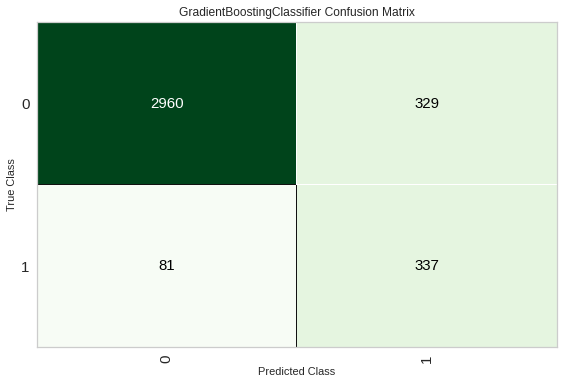

In [13]:
# Visualizing confusion matrix
plot_model(gbc, plot = 'confusion_matrix')

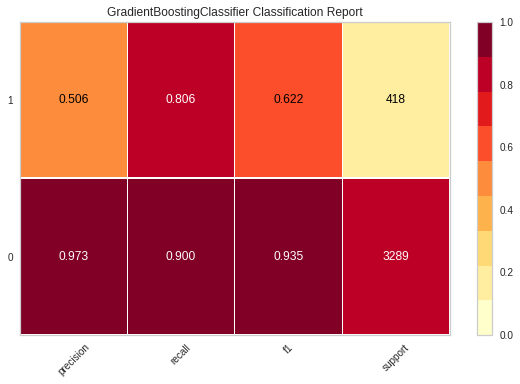

In [14]:
# Visualizing classification report
plot_model(gbc, plot = 'class_report', )

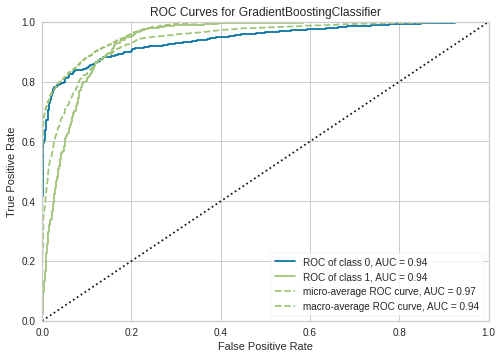

In [15]:
# Visualizing ROC curves
plot_model(gbc, plot = 'auc')

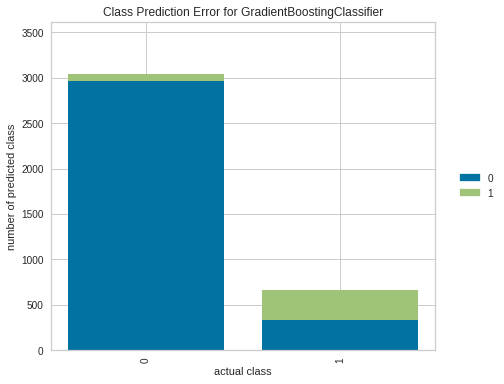

In [16]:
# Visualizing prediction's errors
plot_model(gbc, plot = 'error')

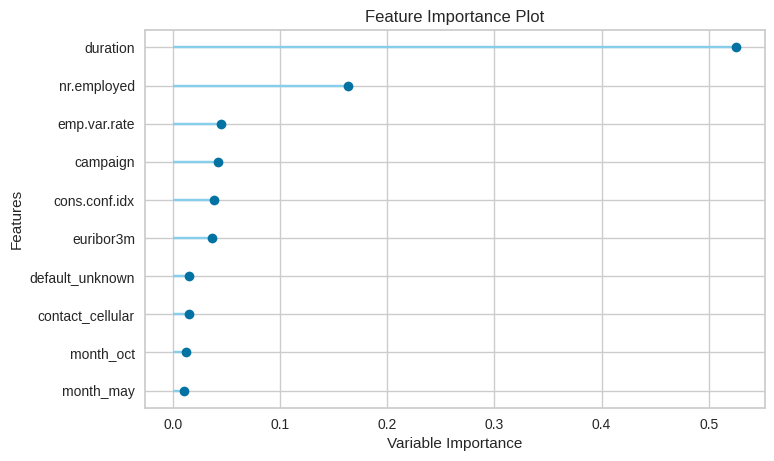

In [17]:
# Visualizing feature importance
plot_model(gbc, plot = 'feature')

Due to the importance of the variable "duration", instead of deleting the variable from the training, perhaps creating a separate model for predicting this variable could be more useful.

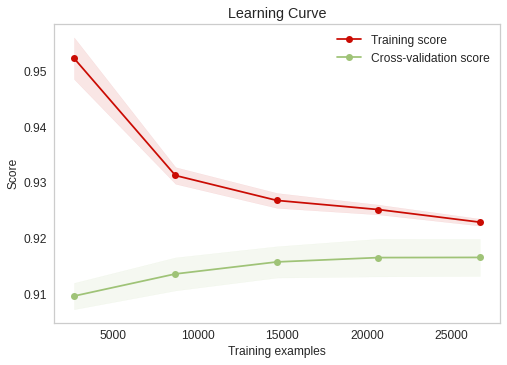

In [19]:
# Visualizing learning curve
X_train = get_config('X_train')
y_train = get_config('y_train')
skplt.estimators.plot_learning_curve(gbc, X_train, y_train)

According to the learning curve, more data could be useful to improve the model performance.

# 6. Predictions on test data

In [20]:
# Predictions on test data
predictions = predict_model(gbc, data=test) 

# Saving predictions and true values as a dataframe
res = pd.DataFrame(predictions['Label']) 
res.index = test.index 
res.columns = ['prediction']
res['True values'] = test['subscribed']
res['scores'] = predictions['Score']

y_test= res['True values']
y_pred = res['prediction']

In [21]:
# Classification report for test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.98      0.91      0.94      3655
         yes       0.53      0.83      0.65       464

    accuracy                           0.90      4119
   macro avg       0.75      0.87      0.79      4119
weighted avg       0.93      0.90      0.91      4119



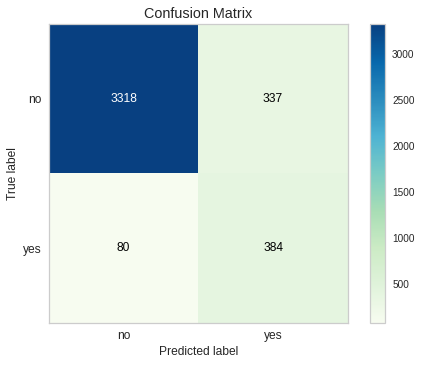

In [22]:
# Confusion Matrix for test data
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap='GnBu')

Results on test data are similar to the ones on validation data.

In [23]:
# Saving the model and its pipeline as a pickle file
save_model(gbc, 'saved_lr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['job', 'marital',
                                                             'education',
                                                             'default',
                                                             'housing', 'loan',
                                                             'contact', 'month',
                                                             'day_of_week',
                                                             'poutcome'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['age', 'campaign',
                                                           'pdays', 'previous',
                                                      